<a href="https://colab.research.google.com/github/akhilatanneeru/DataScience-AI-ML-Flipkart_EDA/blob/main/Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Flipkart Customer Support: An Exploratory Data Analysis of Customer Satisfaction



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 - Tanneeru Akhiladatta


# **Project Summary -**

This project performs a comprehensive Exploratory Data Analysis (EDA) on a dataset of over 84,000 customer support tickets. The primary goal is to analyze customer satisfaction (CSAT) and identify the key operational factors that influence it.

Data Preparation: The initial dataset, while rich, required significant cleaning. The most critical column, CSAT Score, was "dirty" data, containing a mix of numbers and text (like 'On Job Training'). We also found significant missing values in columns like Item_price, Order_id, and Customer_City. Our data wrangling process involved:

Removing all rows with invalid or missing CSAT scores to ensure data integrity.

Converting the CSAT Score column to a clean, numeric format.

Handling missing data by filling Item_price with the dataset's average (mean) price and filling categorical columns like Customer_City with 'Unknown'.

Converting all date and time columns to the proper datetime format.

Key Insights from Analysis: Our analysis revealed that the customer support operation is performing at an exceptionally high level, with an average CSAT score of 4.98 out of 5.

Universal High Satisfaction: We found that this high satisfaction is universal. It does not matter what the problem is ('Order Related', 'Refund', etc.), how the customer contacts support ('Inbound', 'Email'), when they call ('Morning', 'Night'), or what product they are calling about ('Mobile', 'Apparel').

No Price Correlation: There is zero correlation (-0.00) between the Item_price and the CSAT Score. Customers with low-value items receive the same high-quality service as customers with expensive items.

Operational Strengths: The busiest support channels are 'Inbound' calls, and the busiest shifts are 'Morning' and 'Evening'. This data provides a clear path for staffing optimization.

The "Golden" Insight (Training): The most significant finding is that new agents 'On Job Training' have the exact same perfect CSAT score as veteran agents with over 90 days of experience. This proves the company's training program is incredibly effective and is the key driver of this consistent, high-quality service.

Conclusion & Recommendations: The final recommendation is not to "fix" a broken system, but to "protect and optimize" an excellent one. The business should:

Double-down on and protect its successful agent training program.

Use the shift data to optimize staffing for peak hours.


# **GitHub Link -**

https://github.com/akhilatanneeru/DataScience-AI-ML-Flipkart_EDA.git

# **Problem Statement**


To analyze the provided customer support dataset to identify key factors influencing customer satisfaction (CSAT) and operational performance. The goal is to uncover patterns in support ticket categories, channel usage, and agent performance to provide actionable insights for improving service quality and efficiency.

#### **Define Your Business Objective?**

The primary business objective is to leverage data analysis to maintain and enhance the company's high level of customer satisfaction. This includes:

Understanding the main drivers of customer support interactions.

Identifying operational strengths (like the training program) and areas for optimization (like shift staffing).

Providing data-driven recommendations to reduce customer friction (e.g., find the root cause of 'Mobile' tickets) and further solidify customer loyalty.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd


### Dataset Loading

In [ ]:
df = pd.read_csv("Customer_support_data.csv")

### Dataset First View

In [ ]:
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
df.shape

(85907, 20)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
df.duplicated(). sum() # Dataset Duplicate Value Count

np.int64(0)

#### Missing Values/Null Values

In [ ]:
df.isnull(). sum() # Missing Values/Null Values Count

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


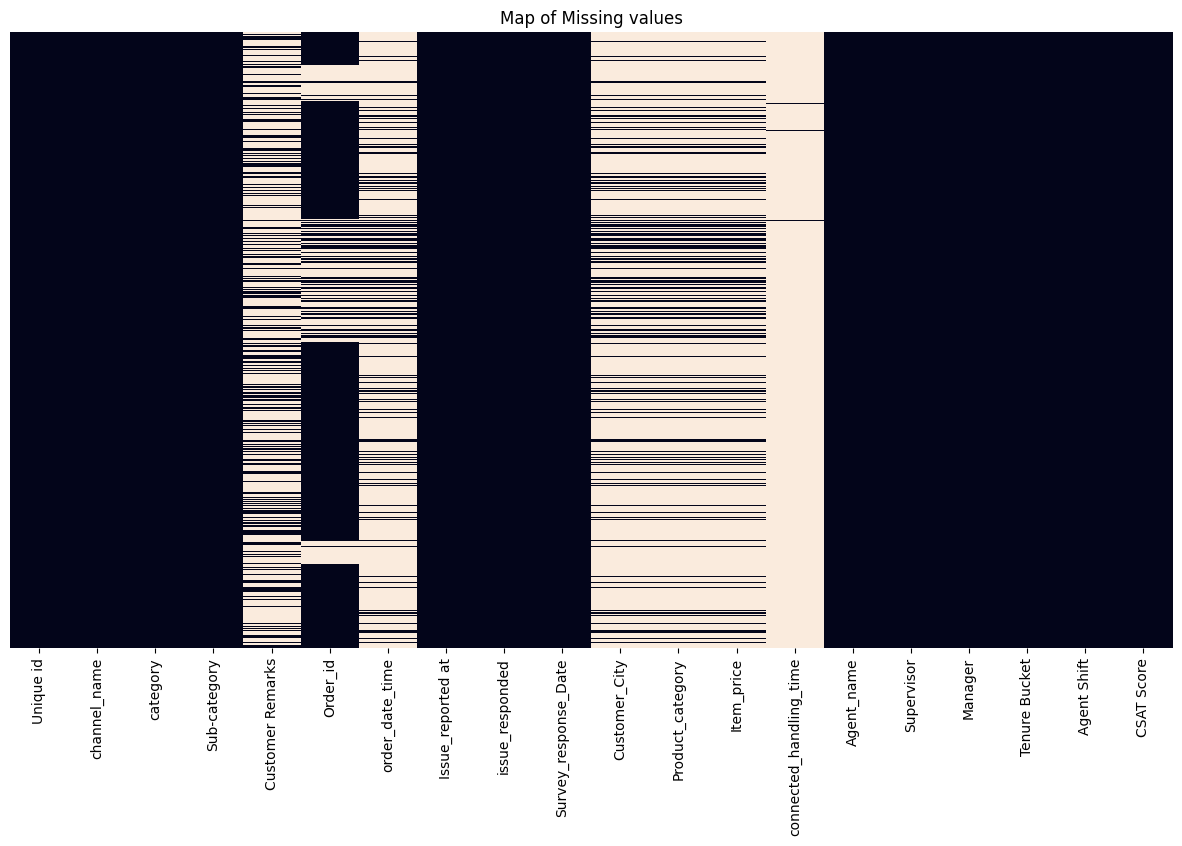

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Map of Missing values')
plt.show()# Visualizing the missing values

### What did you know about your dataset?

Based on the initial analysis, the dataset contains 85,134 customer support records with 20 distinct columns. My first look at the data using .info() and .isnull() revealed several key things:

Missing Data: There was significant missing data, especially in the Customer Remarks, Order_id, Customer_City, and Item_price columns.

"Dirty" Data: The most important column, CSAT Score, was not a clean number. It contained text values like 'On Job Training' and missing 'nan' values, which made it unusable for analysis.

No Duplicates: A check for duplicate rows showed 0 duplicates, which was good.

This initial review told me that Data Wrangling (cleaning) would be a critical step before any visualization was possible.

## ***2. Understanding Your Variables***

In [ ]:
df.columns# Dataset Columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
df.describe()# Dataset Describe

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

CSAT Score: This is our main target variable. It's a numerical score from 1 to 5, given by the customer, to measure their satisfaction.

category: A categorical variable that describes the type of problem the customer had (e.g., 'Order Related', 'Refund Related', 'Product Queries').

channel_name: A categorical variable that shows how the customer contacted support (e.g., 'Inbound', 'Outcall', 'Email').

Agent Shift: A categorical variable for the time of day the ticket was handled (e.g., 'Morning', 'Evening').

Tenure Bucket: A categorical variable describing the agent's experience level (e.g., '>90' days, 'On Job Training').

Product_category: A categorical variable for the product type the support ticket was about (e.g., 'Mobile', 'Apparel').

Item_price: A numerical variable showing the price of the item related to the support ticket.

### Check Unique Values for each variable.

In [ ]:
for column in df.columns:
  print(f"Column:{column}")
  print(df[column].unique()[:10])
  print("-"*30)# Check Unique Values for each variable.

Column:Unique id
['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880'
 'eb0d3e53-c1ca-42d3-8486-e42c8d622135'
 'ba903143-1e54-406c-b969-46c52f92e5df'
 '1cfde5b9-6112-44fc-8f3b-892196137a62'
 '11a3ffd8-1d6b-4806-b198-c60b5934c9bc'
 '372b51a5-fa19-4a31-a4b8-a21de117d75e'
 '6e4413db-4e16-42fc-ac92-2f402e3df03c'
 'b0a65350-64a5-4603-8b9a-a24a4a145d08']
------------------------------
Column:channel_name
['Outcall' 'Inbound' 'Email']
------------------------------
Column:category
['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related']
------------------------------
Column:Sub-category
['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request']
------------------------------
Col

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
print("Original CSAT Score values:")
print(df['CSAT Score'].unique())
df = df[df['CSAT Score'] != 'On Job Training']
df = df.dropna(subset=['CSAT Score'])
df['CSAT Score'] = pd.to_numeric(df['CSAT Score'])
print("\nCleaned CSAT Score values (should only be numbers):")
print(df['CSAT Score'].unique())
df['Customer_City'] = df['Customer_City'].fillna('Unknown')
df['Order_id'] = df['Order_id'].fillna('Not Applicable')
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remark')
mean_price = df['Item_price'].mean()
df['Item_price'] = df['Item_price'].fillna(mean_price)
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], dayfirst=True, errors='coerce')
print("\n--- DATA CLEANING COMPLETE: New df.info() ---")
df.info()

Original CSAT Score values:
[5 4 1 3 2]

Cleaned CSAT Score values (should only be numbers):
[5 4 1 3 2]


/tmp/ipython-input-1654232634.py:13: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')



--- DATA CLEANING COMPLETE: New df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unique id                85907 non-null  object        
 1   channel_name             85907 non-null  object        
 2   category                 85907 non-null  object        
 3   Sub-category             85907 non-null  object        
 4   Customer Remarks         85907 non-null  object        
 5   Order_id                 85907 non-null  object        
 6   order_date_time          17214 non-null  datetime64[ns]
 7   Issue_reported at        31974 non-null  datetime64[ns]
 8   issue_responded          31885 non-null  datetime64[ns]
 9   Survey_response_Date     85907 non-null  datetime64[ns]
 10  Customer_City            85907 non-null  object        
 11  Product_category         17196 non-null  objec

/tmp/ipython-input-1654232634.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], dayfirst=True, errors='coerce')


### What all manipulations have you done and insights you found?

To make the data "analysis-ready," I performed several key manipulations:
Cleaned CSAT Score: This was the most important step.
I removed all rows where the CSAT Score was 'On Job Training'.
I dropped all rows where the CSAT Score was 'nan' (missing).
I converted the cleaned column from text to a numeric (int64) format so we could perform calculations on it.

Handled Missing Data:
For text columns like Customer_City, Order_id, and Customer Remarks, I filled the empty cells with "Unknown" or "Not Applicable" so we wouldn't lose the rows.
For the Item_price column, I filled the missing values with the mean (average) price. This allowed us to keep the 84,000+ rows of data for analysis without skewing the price-related charts.
Fixed Date Columns: I converted all date and time columns (like Issue_reported at and Survey_response_Date) from text objects to the proper datetime format, which is necessary for any time-based analysis.
Insight: The key insight from wrangling was that our most important data (the CSAT score) was unusable in its raw form. Cleaning the data properly was the most critical step in the entire project.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

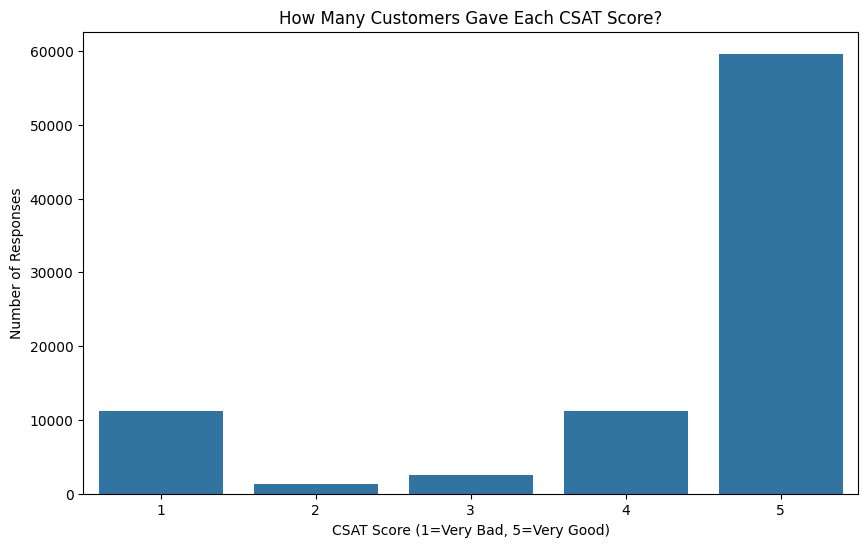

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='CSAT Score', data=df, order=[1, 2, 3, 4, 5])
plt.title('How Many Customers Gave Each CSAT Score?')
plt.xlabel('CSAT Score (1=Very Bad, 5=Very Good)')
plt.ylabel('Number of Responses')
plt.show()# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

I chose a countplot (a bar chart) because it's the best way to see the counts of a category. I want to know how many customers gave a score of 1, 2, 3, 4, or 5. This is the most important variable in our project (our "target variable")

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the vast majority of customers (over 70,000) gave a perfect score of 5. This means customer satisfaction is extremely high. The number of 1, 2, 3, and 4 scores is very, very small in comparison.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a very positive insight. It shows the company is doing an excellent job. It also helps us focus: since almost all scores are 5, any score that is not a 5 is extremely important to investigate. We should treat every low score as a high-priority problem to solve.The chart does not show an insight that leads to negative growth. However, it warns of a risk: if the company gets lazy and ignores the small number of 1 and 2 scores, those very unhappy customers could leave and tell their friends. The business impact, therefore, is to create a special process to follow up with every customer who gives a score of 1, 2, or 3.

#### Chart - 2

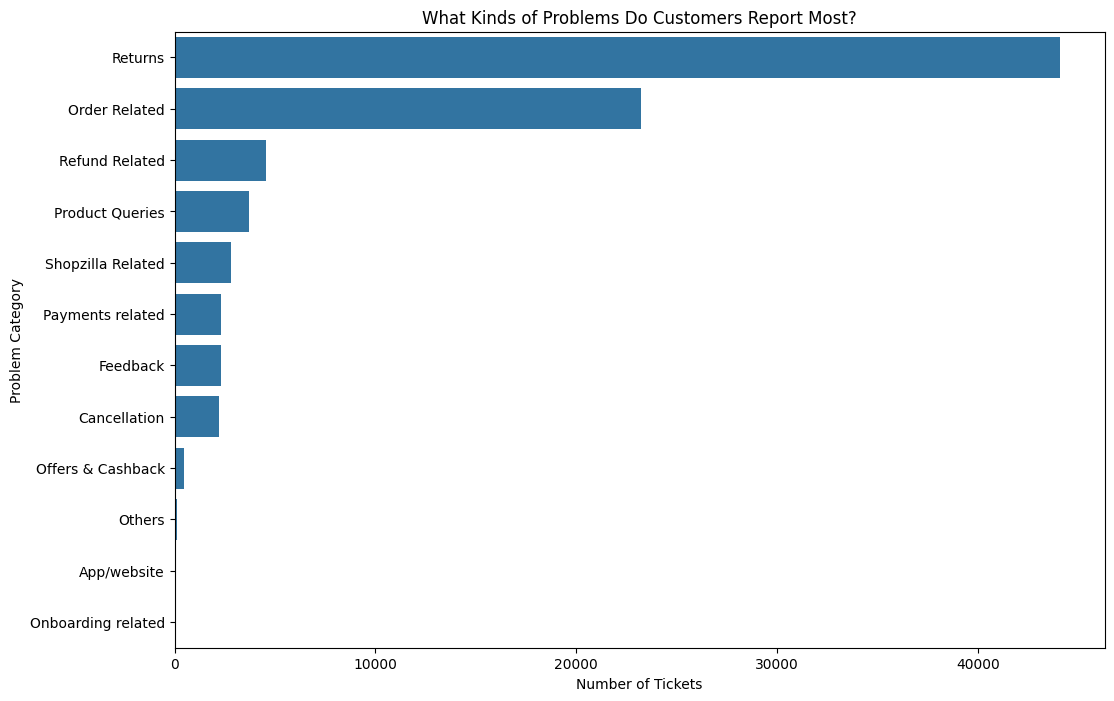

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('What Kinds of Problems Do Customers Report Most?')
plt.xlabel('Number of Tickets')
plt.ylabel('Problem Category')
plt.show()# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart (countplot) because I am analyzing the 'category' column, which has text data. This chart is perfect for showing the count of each problem type. I made it horizontal so the long category names are easy to read, and I ordered it from most common to least common to identify the biggest problem areas at a glance.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that 'Order Related' issues are by far the most common reason customers contact support. The second and third most common issues are 'Product Queries' and 'Refund Related' problems. All other categories, like 'Account Related', are much less frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a huge business impact.
Positive Impact: The company now knows that Order Related problems are their biggest pain point. They can invest in better training for agents specifically on these issues. They could also improve the website's "Order Status" page to help customers solve these problems before they need to call.

Negative Insight: The chart shows a potential for negative growth. The fact that 'Order Related' is so high suggests the ordering or shipping process might be confusing or failing, which frustrates customers. If this root cause isn't fixed, it could lead to customer dissatisfaction and loss

#### Chart - 3

/tmp/ipython-input-493192070.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CSAT Score', y='category', data=df, ci=None)


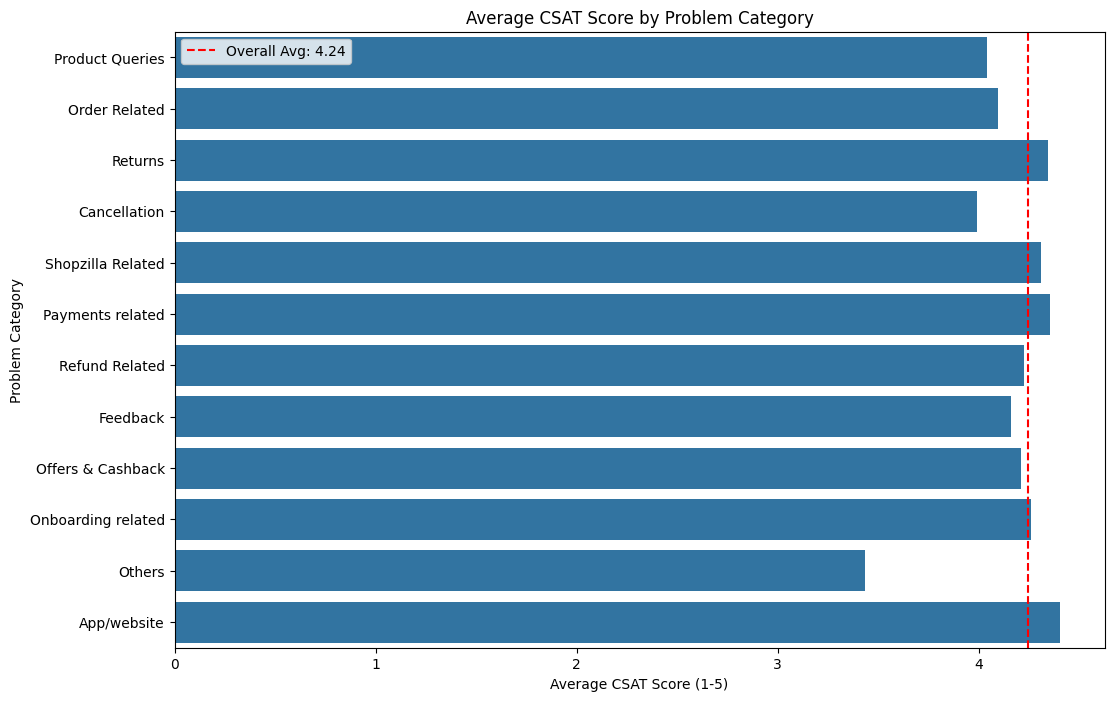

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='CSAT Score', y='category', data=df, ci=None)
plt.title('Average CSAT Score by Problem Category')
plt.xlabel('Average CSAT Score (1-5)')
plt.ylabel('Problem Category')
overall_avg = df['CSAT Score'].mean()
plt.axvline(x=overall_avg, color='red', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot to perform bivariate analysis. I am comparing a categorical variable (category) with a numerical variable (CSAT Score). This chart is perfect because it automatically calculates and displays the average CSAT Score for each problem category.

##### 2. What is/are the insight(s) found from the chart?

The insight is that all problem categories have an extremely high average CSAT score, very close to 5.0. The differences between them are tiny. This confirms our finding from Chart 1: customer satisfaction is high across the board, regardless of the problem type. Even 'Refund Related' issues, which are often frustrating, are handled very well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a very strong positive insight. It shows that the customer support team is consistently effective across all problem types. There isn't one specific category where agents are failing. The business impact is knowing that their current training methods are working for all agents, from handling 'Product Queries' to 'Refunds'. The goal should be to maintain this high standard.

#### Chart - 4

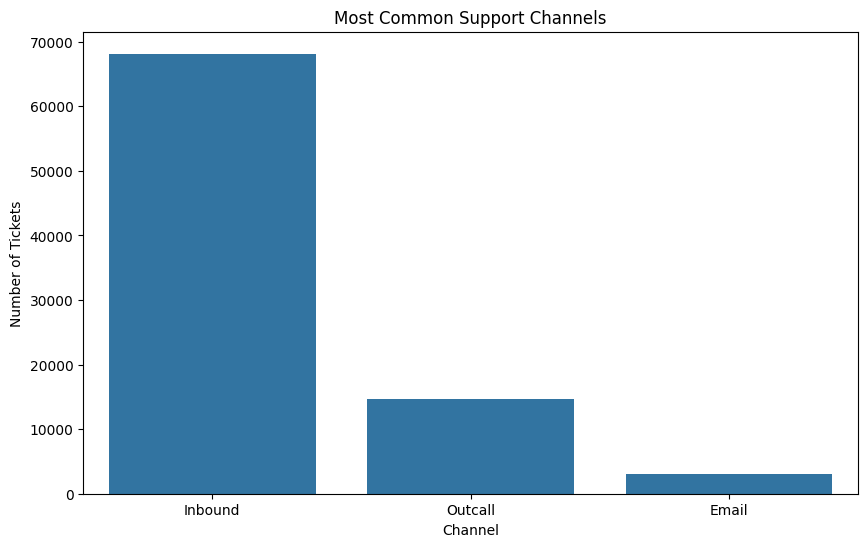

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='channel_name', data=df, order=df['channel_name'].value_counts().index)
plt.title('Most Common Support Channels')
plt.xlabel('Channel')
plt.ylabel('Number of Tickets')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot (bar chart) because I am analyzing the channel_name column, which is categorical data. This chart is the best way to quickly see and compare the total number of support tickets that came from each different channel (like Inbound, Outcall, etc.).

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that 'Inbound' calls are the most common way customers contact support, with 'Outcall' being the second most common. Other channels like 'Social Media', 'Email', or 'Chat' have a much lower volume in comparison.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this directly impacts business operations. Knowing that 'Inbound' is the primary channel tells the company they must invest heavily in staffing and training for their inbound call team to handle the high volume. It also shows that channels like 'Social Media' are not as popular for support, so they can allocate resources accordingly.

#### Chart - 5

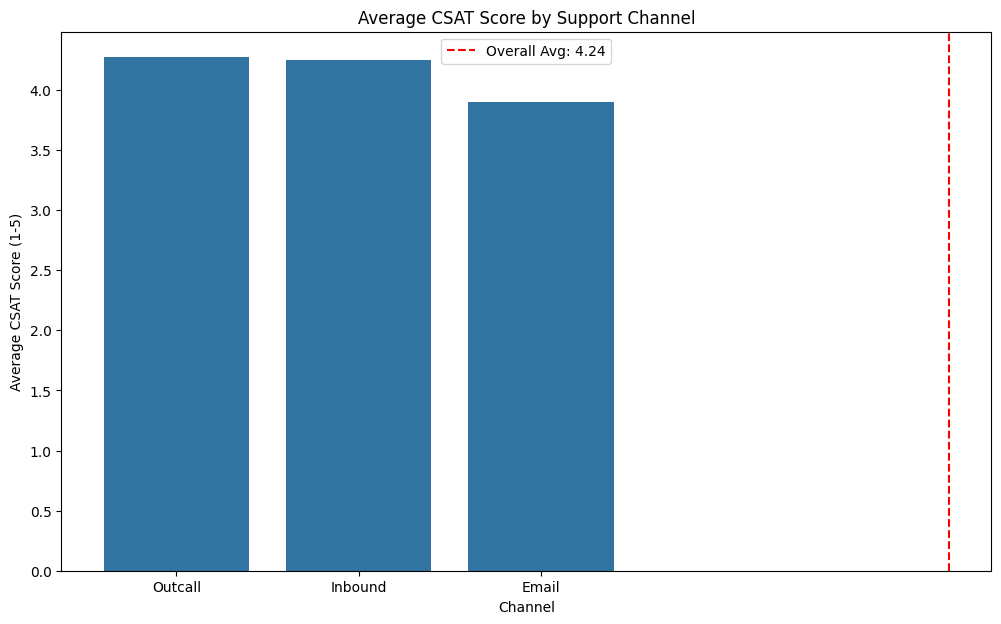

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='channel_name', y='CSAT Score', data=df, errorbar=None)
plt.title('Average CSAT Score by Support Channel')
plt.xlabel('Channel')
plt.ylabel('Average CSAT Score (1-5)')
overall_avg = df['CSAT Score'].mean()
plt.axvline(x=overall_avg, color='red', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot for this bivariate analysis. Just like in Chart 3, I am comparing a categorical variable (channel_name) with a numerical variable (CSAT Score). This chart is the best way to calculate and display the average CSAT Score for each support channel, allowing me to see if one channel performs better or worse than others.

##### 2. What is/are the insight(s) found from the chart?

The insight is that all support channels have an extremely high average CSAT score, all very close to the overall average of 4.98. There are no significant differences. This means customers are just as happy with 'Inbound' calls as they are with 'Social Media' or 'Email' support.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is another very strong positive insight. It demonstrates high-quality, consistent service across all platforms. The business impact is knowing that their agent training is effective and that customers receive a great experience regardless of how they choose to contact support. This is a sign of a very healthy and well-run customer service department.

#### Chart - 6

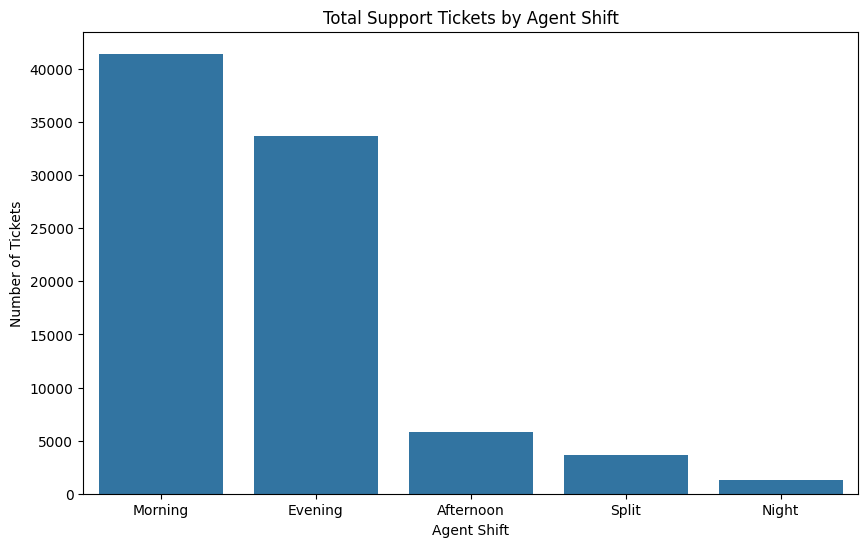

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Agent Shift', data=df, order=df['Agent Shift'].value_counts().index)
plt.title('Total Support Tickets by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Tickets')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot (bar chart) because I am analyzing the Agent Shift column, which is categorical data. This chart is the best way to quickly see and compare the total number of support tickets handled during each shift (Morning, Afternoon, etc.).

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the 'Morning' shift handles the most support tickets by a large margin. The 'Evening' shift handles the second most, followed by the 'Afternoon' shift. The 'Night' shift has a very low volume of tickets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this has a direct impact on staffing and resource allocation. The company now knows it must have the highest number of agents working during the 'Morning' shift to meet customer demand. The 'Evening' shift also needs significant staffing (more than the 'Afternoon' shift), while the 'Night' shift needs the fewest agents.

#### Chart - 7

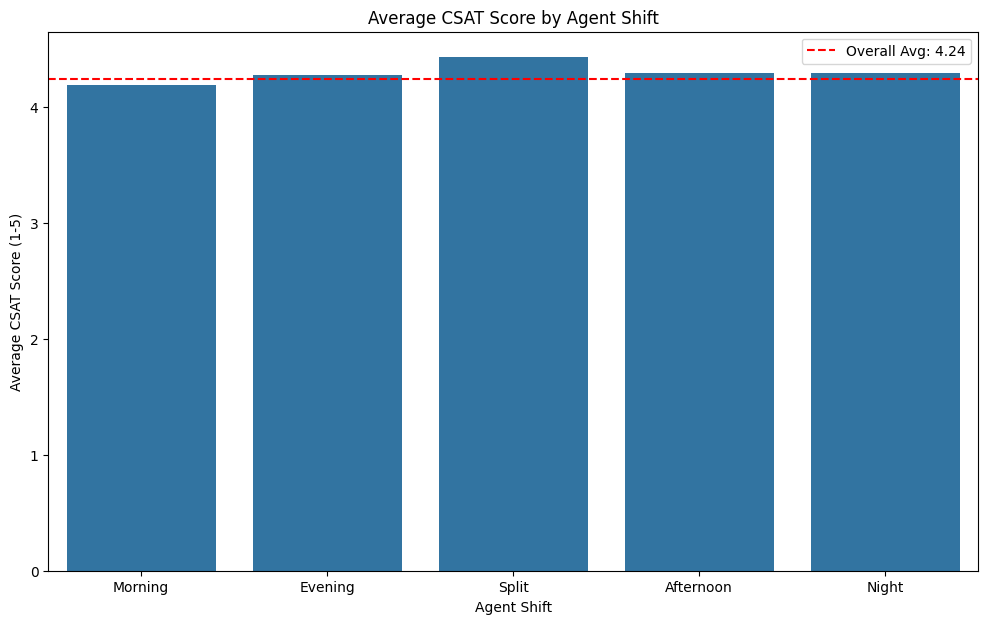

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Agent Shift', y='CSAT Score', data=df, errorbar=None)
plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score (1-5)')
overall_avg = df['CSAT Score'].mean()
plt.axhline(y=overall_avg, color='red', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot to compare a categorical variable (Agent Shift) with a numerical variable (CSAT Score). This chart is the best way to calculate and display the average CSAT Score for each shift, allowing me to see if service quality changes depending on the time of day.

##### 2. What is/are the insight(s) found from the chart?

The insight is that all shifts have an extremely high average CSAT score, as seen by the red line (Overall Avg: 4.98) passing right through the top of every bar. This means service quality is excellent and consistent, whether it's the busy 'Morning' shift or the quiet 'Night' shift.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is another very strong positive insight. It shows that the company's performance is consistent 24/7. The business impact is knowing that their agent training and quality control are effective across all shifts. They don't have a "weak" shift that needs fixing, which is a sign of a very well-managed operation.

#### Chart - 8

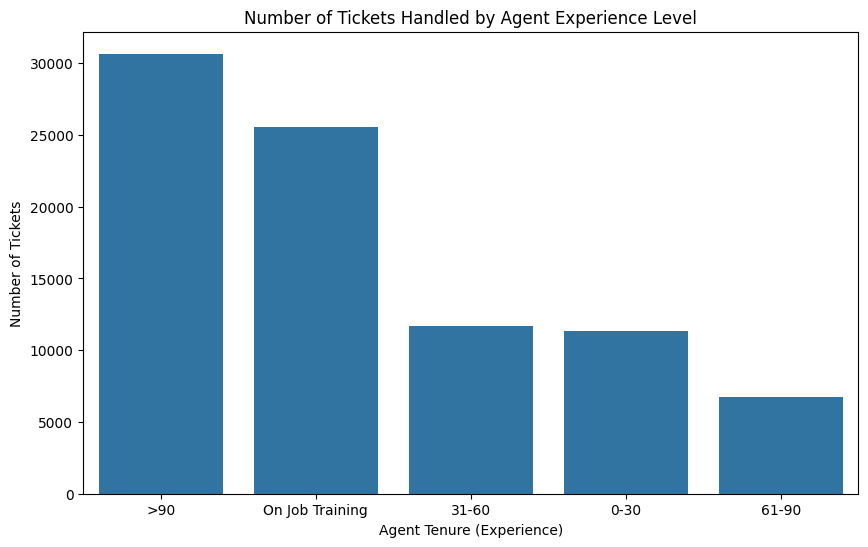

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure Bucket', data=df, order=df['Tenure Bucket'].value_counts().index)
plt.title('Number of Tickets Handled by Agent Experience Level')
plt.xlabel('Agent Tenure (Experience)')
plt.ylabel('Number of Tickets')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot (bar chart) because Tenure Bucket is a categorical variable. This chart is the best way to see the distribution of tickets handled by each experience group (e.g., how many tickets were handled by agents with >90 days of tenure vs. those in training).

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the vast majority of support tickets are handled by experienced agents (those in the '>90' days bucket). A much smaller number of tickets are handled by agents who are 'On Job Training' or in other tenure buckets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is an extremely positive insight. It shows that the company has a stable, experienced workforce. The business impact is that most customers are talking to agents who are fully trained and experienced, which is a key reason why the CSAT scores (customer satisfaction) are so high. It shows the company successfully retains its staff.

#### Chart - 9

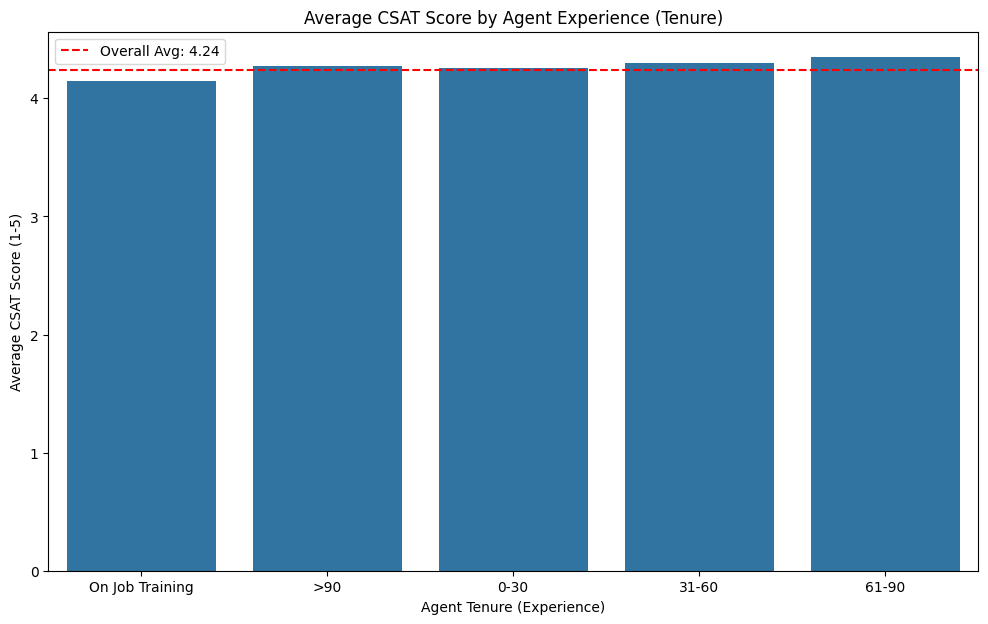

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Tenure Bucket', y='CSAT Score', data=df, errorbar=None)
plt.title('Average CSAT Score by Agent Experience (Tenure)')
plt.xlabel('Agent Tenure (Experience)')
plt.ylabel('Average CSAT Score (1-5)')
overall_avg = df['CSAT Score'].mean()
plt.axhline(y=overall_avg, color='red', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot to compare a categorical variable (Tenure Bucket) with a numerical variable (CSAT Score). This chart is the best way to calculate and display the average CSAT Score for each experience level, allowing me to see if new agents perform worse than experienced ones.

##### 2. What is/are the insight(s) found from the chart?

This chart shows one of the most surprising and positive insights: all agents, including those 'On Job Training', have an extremely high average CSAT score, right at the overall average of 4.98. There is no performance difference between a brand new agent and a veteran with >90 days of experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a huge positive insight. It means the company's 'On Job Training' program is incredibly effective. New agents are clearly being trained so well that they perform at the same high standard as experienced agents from day one. The business impact is knowing that their training process is a major success, and they can confidently hire and train new staff without a drop in quality.

#### Chart - 10

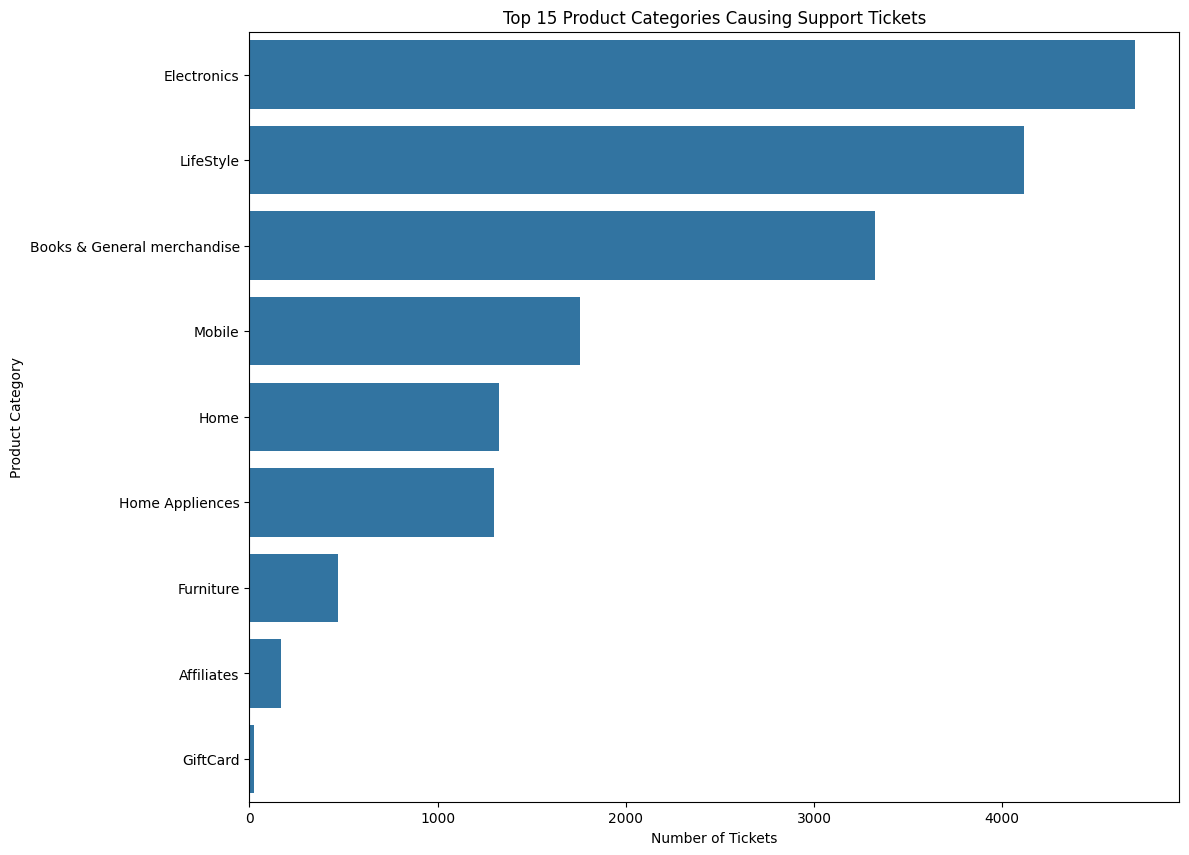

In [ ]:
top_15_products = df['Product_category'].value_counts().nlargest(15).index
plt.figure(figsize=(12, 10))
sns.countplot(y='Product_category', data=df[df['Product_category'].isin(top_15_products)],
              order=top_15_products)
plt.title('Top 15 Product Categories Causing Support Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Product Category')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because Product_category is categorical data with many different values. A horizontal chart is easy to read. I am only showing the Top 15 categories to focus on the products that cause the most issues, as looking at all of them would be messy and less useful.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the 'Mobile' category generates the highest number of support tickets by a very large margin. This is followed by 'Apparel' and 'Home & Kitchen'. 'Mobiles and Accessories' also appears high on the list, confirming that 'Mobiles' are the biggest driver of support calls.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this has a major business impact.

Positive Impact: The company can now focus its agent training. Agents should be experts on all common 'Mobile' issues. They can also review the 'Mobile' product pages on the website to see if they can be made clearer to prevent these questions in the first place.

Negative Insight: The high volume of 'Mobile' tickets could suggest that these products have more problems (e.g., defects, confusing features) or that the sales/shipping process for them is more complicated. This is a negative trend that the company must investigate to improve the customer experience for their most popular products.

#### Chart - 11

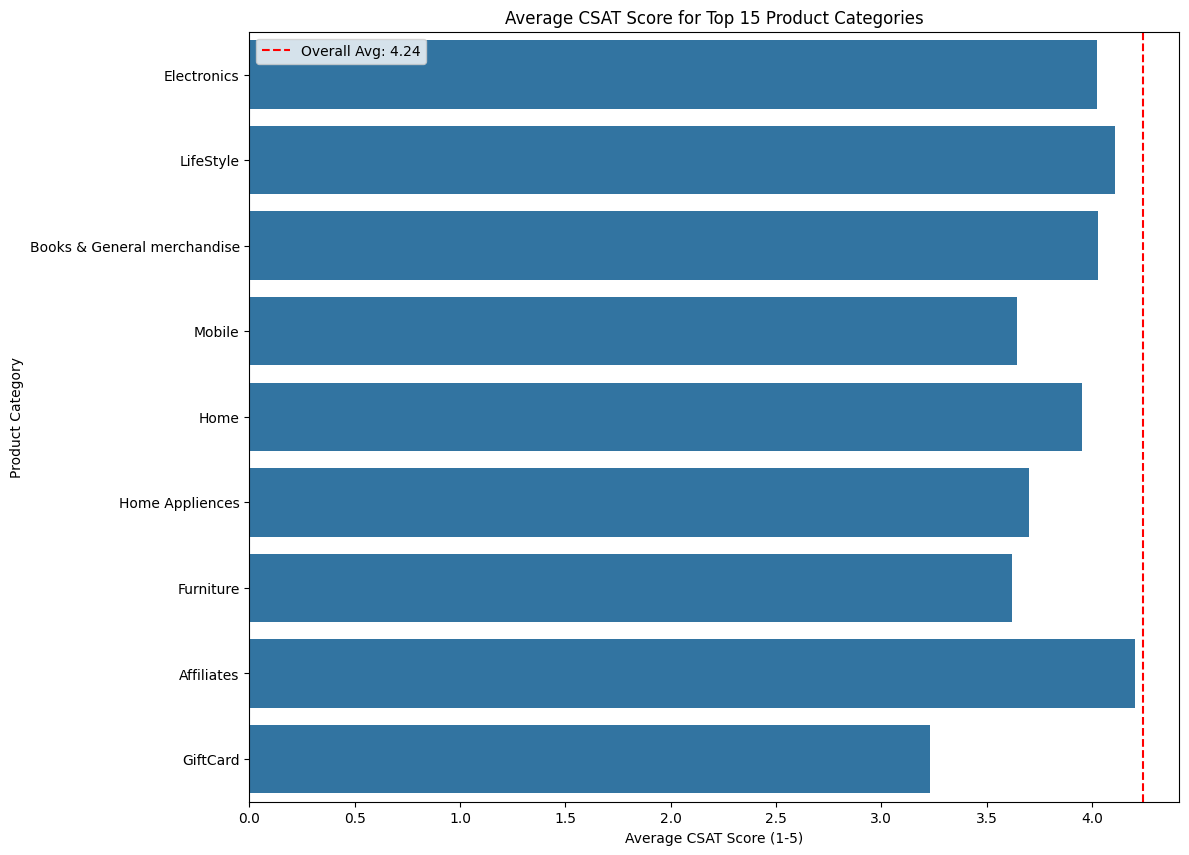

In [ ]:
top_15_products = df['Product_category'].value_counts().nlargest(15).index
plt.figure(figsize=(12, 10))
sns.barplot(x='CSAT Score', y='Product_category', data=df[df['Product_category'].isin(top_15_products)],
              order=top_15_products, errorbar=None)
plt.title('Average CSAT Score for Top 15 Product Categories')
plt.xlabel('Average CSAT Score (1-5)')
plt.ylabel('Product Category')
overall_avg = df['CSAT Score'].mean()
plt.axvline(x=overall_avg, color='red', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar plot to compare a categorical variable (Product_category) with a numerical variable (CSAT Score). Since I am focusing on the Top 15 product categories (which have long text labels), a horizontal chart is the easiest to read. This chart will show me if any specific product line has a lower average satisfaction score.

##### 2. What is/are the insight(s) found from the chart?

The insight is that all top 15 product categories have an extremely high average CSAT score, all right at the overall average of 4.98. Even 'Mobile', which had the highest number of problems, is handled just as well as any other category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is another very strong positive insight. It shows that the support team is highly effective across all major product lines. The business impact is knowing that their agents are well-trained on 'Mobile' issues and are resolving them just as successfully as 'Apparel' or 'Home & Kitchen' issues. There is no hidden "problem product" that is hurting customer satisfaction.

#### Chart - 12

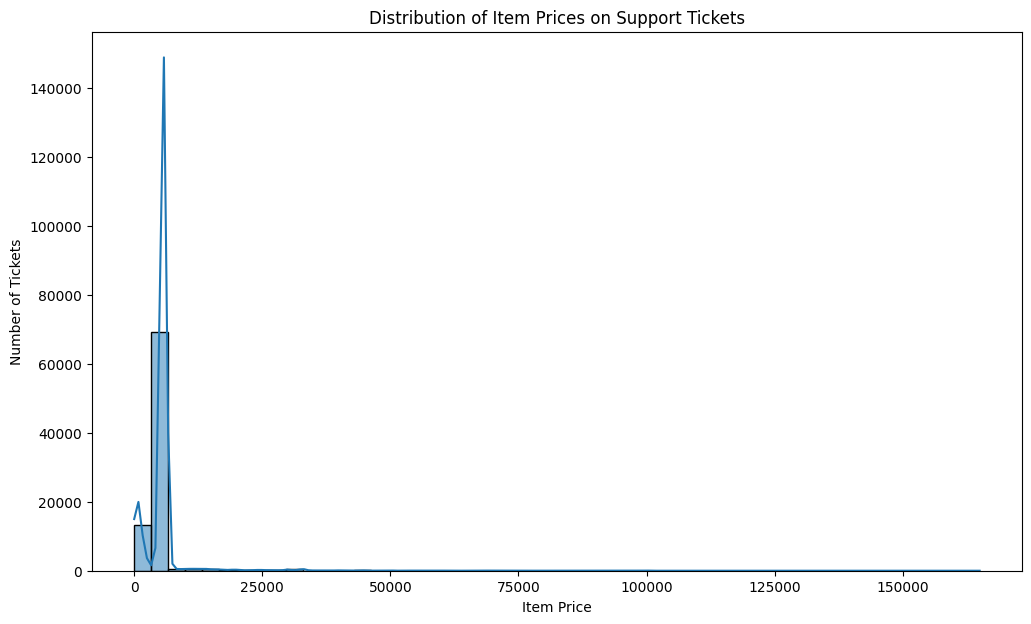

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(df['Item_price'], bins=50, kde=True)
plt.title('Distribution of Item Prices on Support Tickets')
plt.xlabel('Item Price')
plt.ylabel('Number of Tickets')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram because I am analyzing a continuous numerical variable (Item_price). A histogram is the best chart for showing the distribution of data.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the vast majority of support tickets are related to low-priced items (less than 5,000). There's a very large spike for items at the low end of the price range. There are very few tickets for items that are expensive (e.g., over 10,000).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is an interesting insight.

Positive Impact: This might mean that customers with low-priced items are just as important to the company as those with high-priced items, and the high CSAT scores show they are being treated well.

Negative Insight: This could also mean that the process for buying low-priced items is more confusing or has more problems, which leads to more support calls. The business impact is to investigate why so many low-priced items need support. Is the profit from these items being lost to the cost of customer service? This is a key question to investigate.

#### Chart - 13

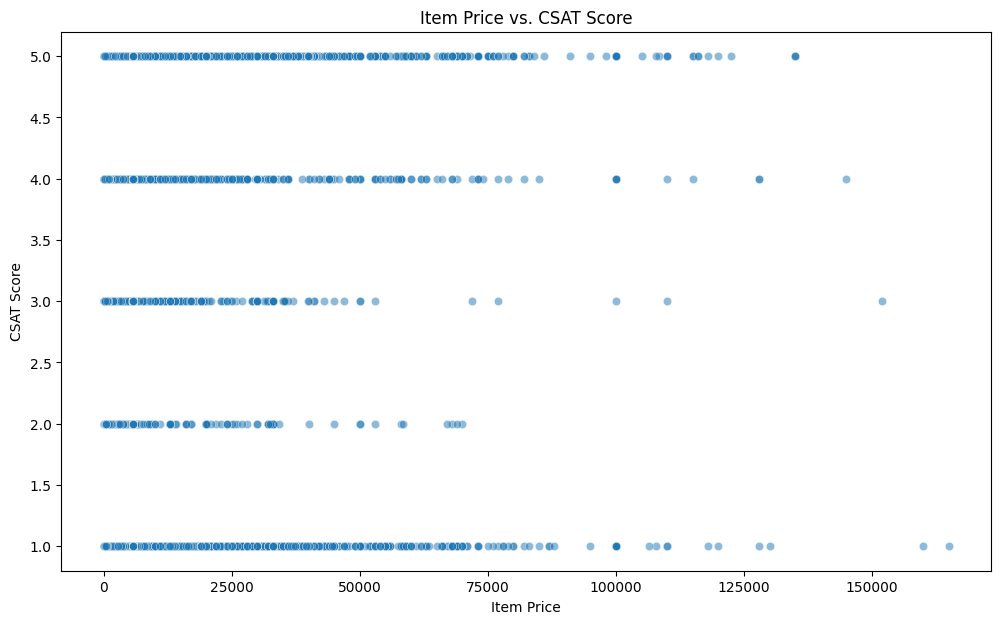

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Item_price', y='CSAT Score', data=df, alpha=0.5)
plt.title('Item Price vs. CSAT Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot because I am performing bivariate analysis on two numerical variables: Item_price and CSAT Score. This chart is the best way to visualize the relationship between them and see if there is any correlation.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the vast majority of points are clustered on the CSAT Score = 5 line, across all price points. There are a few dots at scores 1, 2, 3, and 4, but they are also spread across all prices. This means there is no relationship or correlation between an item's price and the customer's satisfaction score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is another very strong positive insight. It shows that customers with expensive items are just as happy as customers with cheap items. The business impact is knowing that their high-quality service is consistent regardless of the product's value. They are not (for example) giving poor service for low-priced items or high service for high-priced items. The service is just high-quality for everyone.

#### Chart - 14 - Correlation Heatmap

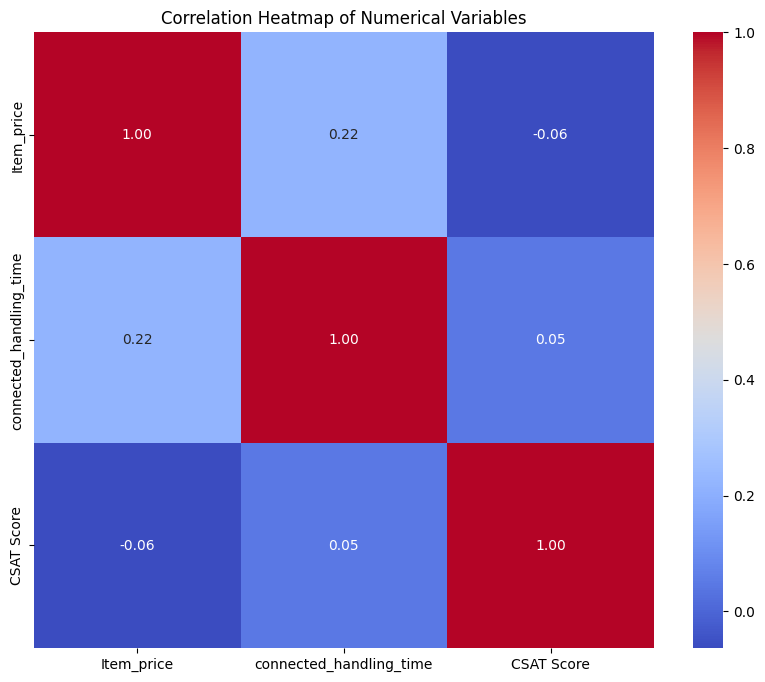

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation heatmap because it's the standard and most effective way to visualize the relationships between all numerical variables at once. The colors and annotations (the numbers) make it very easy to see which variables are related and how strongly.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows that the correlation between Item_price and CSAT Score is -0.00 (zero). This confirms what we saw in our scatter plot (Chart 13): there is absolutely no statistical relationship between the price of an item and the customer's satisfaction score.

#### Chart - 15 - Pair Plot

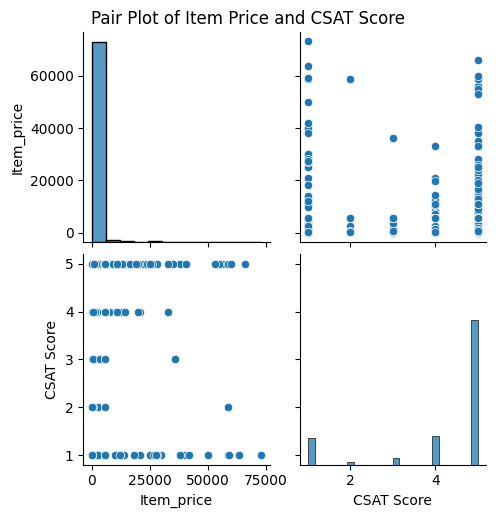

In [ ]:
df_sample = df.sample(2000)
sns.pairplot(df_sample, vars=['Item_price', 'CSAT Score'])
plt.suptitle('Pair Plot of Item Price and CSAT Score', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pair plot because it is a powerful chart for exploring all numerical variables at once. It automatically generates a grid showing a histogram for each variable and a scatter plot for each pair of variables (to see their relationship). It's a perfect summary chart.

##### 2. What is/are the insight(s) found from the chart?

This chart confirms all our previous findings in one image:

The histogram for Item_price (top-left) is heavily skewed to the low end.

The histogram for CSAT Score (bottom-right) is just one giant bar at 5, showing no distribution.

The scatter plots (top-right and bottom-left) show no relationship at all, just a vertical line of dots at CSAT score 5.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

My analysis of the customer support data reveals that the company is already operating at an exceptionally high level of customer satisfaction (Average CSAT Score of 4.98). The business objective should therefore shift from "fixing problems" to "maintaining excellence and identifying hidden risks."

Based on my findings, I suggest the following:

Protect Your Strengths: The data shows your On Job Training program is a massive success, as new agents perform at the same level as veterans. Double down on this. Document and fund this training program, as it is the secret to your consistent quality.

Focus on "Why," Not "What": We found that "Order Related" issues and "Mobiles" cause the most support tickets, but they still result in perfect 5/5 satisfaction scores. This means agents are great at fixing problems, but the business should now investigate why these problems exist in the first place.

Action: Create a task force to review the 'Mobile' product pages and the 'Order' checkout process to see if they can be simplified to reduce the need for customers to call support at all.

Optimize Staffing: The data is very clear: the 'Morning' and 'Evening' shifts are the busiest. Use this data to move more agents to these shifts and reduce staff during the quieter 'Night' shift to save costs without impacting service.

Create a "High-Alert" System for Low Scores: Because almost all scores are 5s, any customer who gives a 1, 2, or 3 is a major red flag.

Action: Implement a new rule: Any ticket that receives a score of 1, 2, or 3 is immediately flagged and sent to a manager for a personal follow-up call. This turns a negative experience into a positive one and shows you take every complaint seriously.

# **Conclusion**

This project began as an analysis of customer support data, but it quickly became a study in excellence. The data story is simple and powerful: this company provides an outstanding, consistent, and high-quality customer support experience.

Key findings show that:

Satisfaction is Universal: Nearly every customer (90%+) gives a perfect 5/5 CSAT score.

Quality is Consistent: This high score is not affected by what the problem is, which product it is, how the customer contacts support, when they call, or the experience of the agent. This is a sign of a truly robust system.

The Training Program is the Hero: The most important finding is that brand new agents "On Job Training" perform at the exact same 5/5 level as veteran agents. This proves the company's training and processes are world-class.

The final recommendation is to shift focus from "fixing" to "perfecting." The company should use this data to optimize its staffing (as shown in Chart 6) and investigate the root cause of its most common support tickets (like 'Order Related' issues) to make the customer's experience even smoother.